# 3-D Electric Field Visualization
This Notebook explores how the electric-field.py code works and visualizes the electric field in a 3-D plot due to the nuclear cores of the atoms. The final atom configuration is taken from a final relaxation step done in Quantum Espresso. The code calculates electric field over a grid of points that as default is taken as 80x80x80. The package ipyvolume is used for these 3-D visualizations.

In [14]:
import numpy as np
import ipyvolume as ipv
filename = "D:/Github/electric-field/data/results/grid_efield.npy"
grid_efield = np.load(filename)
grid_efield = grid_efield.reshape((80,80,80)).transpose()

We reshape the grid_efield numpy file into the 3-D grid dimensions using reshape. Now it can be used in an argument for the quickvolshow command from ipyvolume. 

In [15]:
ipv.quickvolshow(grid_efield)

## 2-D Visualization
2-D visualization of the slices of the 3-D plot may be done by pcolor which offers the ability to have a 2-D color map with colors indicating the intensity of the electric field at that point. The variable 'N' allows us to choose which slice to visualize. The x and y variables create and arange for a meshgrid which is necessary for pcolor to operate. 

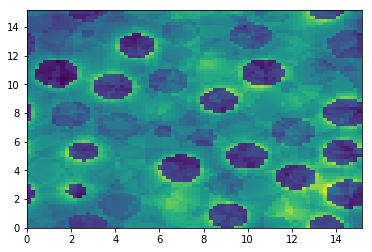

In [19]:
import matplotlib.pyplot as plt

N = 4

x = np.arange(0,15.341,.192)
y = np.arange(0,15.341,.192)
X, Y = np.meshgrid(x,y)


plt.pcolor(X,Y,grid_efield[N])
plt.show()

## Plotting the Atomic Cell and Supercell
For troubleshooting purpose, lets examine the cell and supercell by visualization. We would like to ensure that indeed the atoms are in the correct place. These structures came from the '.card_coords' which is in the pymatgen package. This is necessary to output a numpy array where each row has 3 columns associated with x,y and z coordinates. These can be decomposed into column vectors using split from numpy then flattening into 1-D vectors using ravel(). 

1. First plot the cell
2. Next plot the supercell

In [10]:
import numpy as np
filename = "D:/Github/electric-field/data/results/structure.npy"
coordinates = np.load(filename)

print(coordinates.shape)
xc,yc,zc = np.split(coordinates,3,1)   
xc,yc,zc = xc.ravel(),yc.ravel(),zc.ravel()

(256, 3)


In [11]:
ipv.quickscatter(xc,yc,zc, size =3, marker="sphere")

We will now plot the supercell, since the structure of the numpy array is different we must use the split from numpy to creates columns of x,y and z coordinates that can individually be plotted. ravel() function is used to flatten the array from 2-D to 1-D so that it has the right dimensions to be used in the quickscatter plot. 

In [5]:
import numpy as np
filename = "D:/Github/electric-field/data/results/supercell_structure.npy"
centered_coordinates = np.load(filename)

# We can assign the columns of the numpy array to new variables
# x,y,z using numpy.split 
print(len(centered_coordinates))
print(centered_coordinates.shape)
x,y,z = np.split(centered_coordinates,3,1)     
x,y,z = x.ravel(),y.ravel(),z.ravel()

4239
(4239, 3)


In [6]:
ipv.quickscatter(x,y,z, size =1, marker="sphere")

## Testing for understanding Electric field Calculation

### Enumerate 

enumerate() is one of the built-in Python functions. It returns an enumerate object. 
Enumerate is simply used to provide the index number alongside item as it is iterated. This index start number may also be changed. 

In [18]:
choices = ['pizza', 'pasta', 'salad', 'nachos']
list(enumerate(choices))


[(0, 'pizza'), (1, 'pasta'), (2, 'salad'), (3, 'nachos')]

In [19]:
for idx, itm in enumerate(choices, start =10):
    print(idx,itm)

10 pizza
11 pasta
12 salad
13 nachos


### Zip

Zip makes an iterator that aggregates elements from each of the iterables. Essentially allowing one to combine two lists. It creates and iterator of tuples. 

In [23]:
#Example
numbers = [1,2,3,4]

#We need list to actually show the zip object
print(list(zip(choices,numbers)))

[('pizza', 1), ('pasta', 2), ('salad', 3), ('nachos', 4)]


### Combining both concepts to produce:

In [24]:
list(enumerate(zip(choices,numbers)))

[(0, ('pizza', 1)), (1, ('pasta', 2)), (2, ('salad', 3)), (3, ('nachos', 4))]

### Understanding grid_indicies variable from efield-code

This variable uses kdtree.query_ball_point(x,r,p=2.0,eps=0)

x: the point or points to search for neighbors of (array_like, shape tuple + self.m)

r: the radius of points to return 

p: which minkowski p-norm to use

Returns: (list or array of lists)
If x is a single point, returns a list of the indicies of the neighbors of x. If x is an array of points, returns an object array of shape of tuple containg lists of neighbors. 

From Scipy: 
If you have many points whose neighbors you want to find, you may save substantial amounts of time by putting them in a KDTree and using query_ball_tree.


In this example, we show how the query_ball_point from KDTree works.

1. use mgrid for x and y to create a grid of points, it creates a 4x4 for both x and y
2. next use ravel() to flatten the numpy array into a 1-d vector which is zipped to create a list of coordinates
3. use spatial.KDtree and list out the zip object to create the KDTree
4. use query_ball_point to do a neighbor search for one selected point within desired radius
5. query_ball_point in this case returns the index of the point the fits the criteria


In [54]:
from scipy import spatial
x, y = np.mgrid[0:4, 0:4]

points = zip(x.ravel(), y.ravel())


tree = spatial.KDTree(list(points))


tree.query_ball_point([2, 0], 2)



[0, 4, 5, 8, 9, 10, 12, 13]

In [30]:
import numpy as np

array = np.arange(10).reshape(2,5)
print(array)
print(array.ravel())

[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4 5 6 7 8 9]


## Understanding Pymatgen better
In order to understand why the ipvolume plot of the 3x3x3 supercell looks off, we will attempt to learn more about how pymatgen works and visualize a 3x3x3 offset structure. 